# IMPORTING LIBRARIES

In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
import warnings


- Suppressing some specific warning from joblib and loky

In [2]:
warnings.filterwarnings("ignore", message="Could not find the number of physical cores.*")


# DATA INGESTION

In [3]:
df = pd.read_excel('C:/DATASETS/Rotten_Tomatoes_Movies3.xls')
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [4]:
df.columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [5]:
df.shape

(16638, 16)

In [6]:
df.isna().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [8]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [9]:
df.corr

<bound method DataFrame.corr of                                              movie_title  \
0      Percy Jackson & the Olympians: The Lightning T...   
1                                            Please Give   
2                                                     10   
3                        12 Angry Men (Twelve Angry Men)   
4                           20,000 Leagues Under The Sea   
...                                                  ...   
16633                                          Zoot Suit   
16634                                           Zootopia   
16635                                    Zorba the Greek   
16636                                               Zulu   
16637                                          Zulu Dawn   

                                              movie_info  \
0      A teenager discovers he's the descendant of a ...   
1      Kate has a lot on her mind. There's the ethics...   
2      Blake Edwards' 10 stars Dudley Moore as George...   
3      

In [10]:
df.nunique()

movie_title           16106
movie_info            16613
critics_consensus      8307
rating                    8
genre                  1080
directors              8314
writers               12121
cast                  16326
in_theaters_date       5586
on_streaming_date      2260
runtime_in_minutes      201
studio_name            2886
tomatometer_status        3
tomatometer_rating      101
tomatometer_count       393
audience_rating          98
dtype: int64

In [11]:
df.isna().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

Dropping `critics_consensus` column due to a high proportion of missing values

In [12]:
df = df.drop(columns=['critics_consensus'])

In [13]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_features = df.select_dtypes(include=[np.datetime64]).columns.tolist()

print(f"Numerical Columns ({len(numerical_features)}): \n", numerical_features)
print()
print(f"Categorical Columns ({len(categorical_features)}): \n", categorical_features)
print()
print(f"Datetime Columns ({len(datetime_features)}): \n", datetime_features)
print()


Numerical Columns (4): 
 ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']

Categorical Columns (9): 
 ['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']

Datetime Columns (2): 
 ['in_theaters_date', 'on_streaming_date']



# DATA CLEANING

- Date and Time Conversions

In [14]:
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], errors='coerce')

df['in_theaters_year'] = df['in_theaters_date'].dt.year
df['in_theaters_month'] = df['in_theaters_date'].dt.month
df['in_theaters_day'] = df['in_theaters_date'].dt.day

df['days_to_streaming'] = (df['on_streaming_date'] - df['in_theaters_date']).dt.days

df = df.drop(columns=['in_theaters_date', 'on_streaming_date'], errors='ignore')

- Mapping correctly

In [15]:
rating_correction_map = {
'PG-13)': 'PG-13',  # Fixing extra parenthesis
'NC17': 'NC-17',    # Standardizing format
'R)': 'R'
}
df['rating'] = df['rating'].replace(rating_correction_map)


In [16]:
df['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC-17'], dtype=object)

In [17]:
df['rating'].nunique()

6

In [18]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_features = df.select_dtypes(include=[np.datetime64]).columns.tolist()

print(f"Numerical Columns ({len(numerical_features)}): \n", numerical_features)
print()
print(f"Categorical Columns ({len(categorical_features)}): \n", categorical_features)
print()
print(f"Datetime Columns ({len(datetime_features)}): \n", datetime_features)
print()


Numerical Columns (8): 
 ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'in_theaters_year', 'in_theaters_month', 'in_theaters_day', 'days_to_streaming']

Categorical Columns (9): 
 ['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']

Datetime Columns (0): 
 []



- Handling Missing Values

In [19]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [20]:
df.head(2)

,movie_title,movie_info,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,in_theaters_year,in_theaters_month,in_theaters_day,days_to_streaming
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,49.0,144.0,53.0,2010.0,2.0,12.0,137.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,86.0,140.0,64.0,2010.0,4.0,30.0,172.0


# ENCODING

In [21]:
categorical_features

['movie_title',
 'movie_info',
 'rating',
 'genre',
 'directors',
 'writers',
 'cast',
 'studio_name',
 'tomatometer_status']

- Setting Encoding variables

In [22]:
te_features = ['cast', 'movie_info', 'movie_title']
high_cardinal_features = ['genre', 'directors', 'writers', 'studio_name']
ohe_features = ['rating', 'tomatometer_status']

In [23]:
# Step 1: Applying Target Encoding to some features using category_encoders
target_encoder1 = TargetEncoder(cols=te_features, smoothing=1.0)
df[te_features] = target_encoder1.fit_transform(df[te_features], df['audience_rating'])

# Step 2: Applying Custom Target Encoding to high-cardinality features
target_encoder2 = TargetEncoder(cols=high_cardinal_features, smoothing=5.0)
df[high_cardinal_features] = target_encoder2.fit_transform(df[high_cardinal_features], df['audience_rating'])

# Step 3: Applying One-Hot Encoding to categorical features with low cardinality
df = pd.get_dummies(df, columns=ohe_features, dtype=int)


# PIPELINE

- Regression Models

In [24]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'SupportVectorRegressor': SVR(),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'Ridge': Ridge(alpha=0.1, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5)
}


In [25]:
df.isna().sum()

movie_title                           0
movie_info                            0
genre                                 0
directors                             0
writers                               0
cast                                  0
runtime_in_minutes                    0
studio_name                           0
tomatometer_rating                    0
tomatometer_count                     0
audience_rating                       0
in_theaters_year                      0
in_theaters_month                     0
in_theaters_day                       0
days_to_streaming                     0
rating_G                              0
rating_NC-17                          0
rating_NR                             0
rating_PG                             0
rating_PG-13                          0
rating_R                              0
tomatometer_status_Certified Fresh    0
tomatometer_status_Fresh              0
tomatometer_status_Rotten             0
dtype: int64

- Train Test Split

In [26]:
X = df.drop(columns=['audience_rating'], axis=1)
y = df['audience_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [27]:
results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R^2 Score': r2
    }

# Display the results
results_df = pd.DataFrame(results).T 


  File "c:\Users\kabee\anaconda3\envs\movie\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\kabee\anaconda3\envs\movie\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\kabee\anaconda3\envs\movie\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kabee\anaconda3\envs\movie\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


# EVALUATION METRICS

In [28]:
results_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
LinearRegression,6.465913,82.471164,9.081364,0.797829
RandomForest,0.127359,1.094282,1.046079,0.997317
DecisionTree,0.154624,1.360697,1.166489,0.996664
SupportVectorRegressor,2.823321,37.027158,6.084995,0.909231
GradientBoosting,1.016213,5.445133,2.333481,0.986652
Lasso,6.522907,83.196571,9.121215,0.796051
Ridge,6.487932,82.683860,9.093067,0.797308
ElasticNet,6.786703,85.695661,9.257195,0.789925
KNeighbors,6.406614,70.814707,8.415147,0.826404


- Correlation Matrix

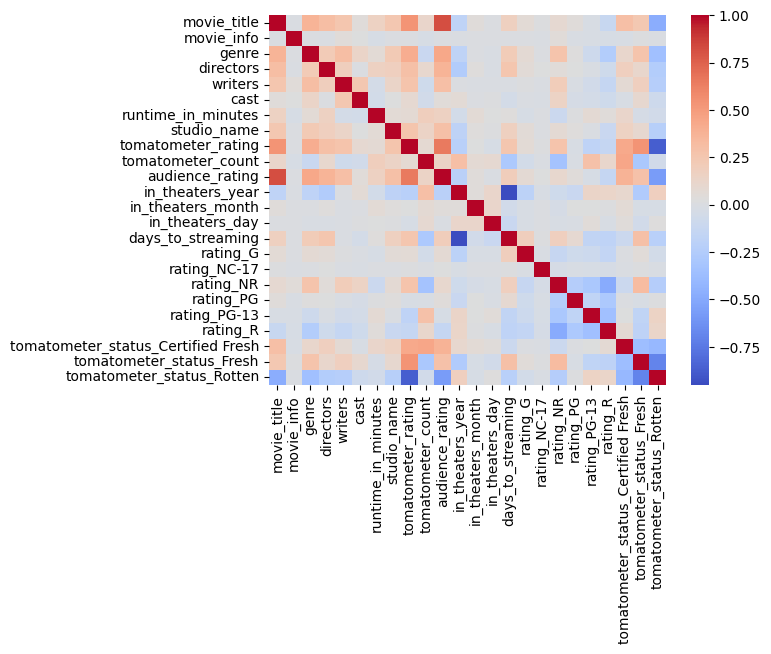

In [29]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()


# Best Model Metrics

In [30]:
best_model_name = max(results, key=lambda model: results[model]['R^2 Score'])
best_model_metrics = results[best_model_name]
best_model = models[best_model_name]

best_model_df = pd.DataFrame([best_model_metrics], index=[best_model_name])
best_model_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R^2 Score
RandomForest,0.127359,1.094282,1.046079,0.997317


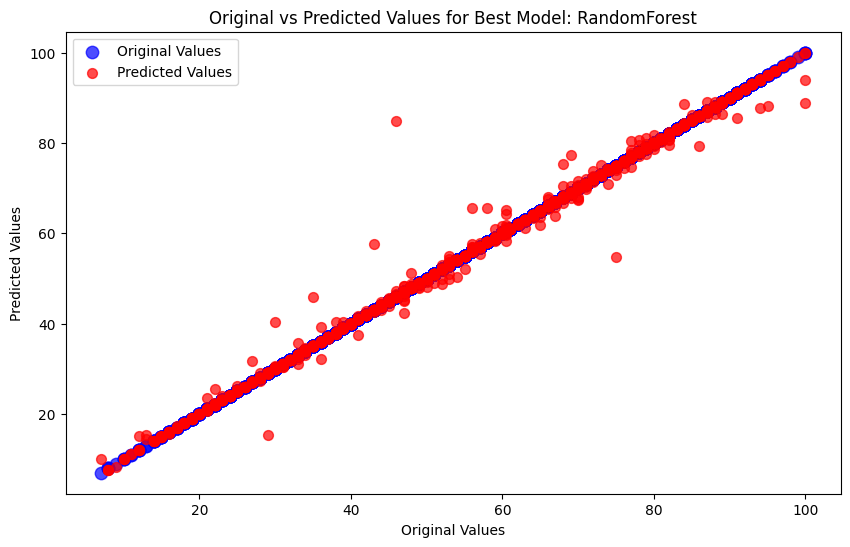

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

pipeline.fit(X_train, y_train)
y_pred_best = pipeline.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Original Values', alpha=0.7, s=80)  # Larger size
plt.scatter(y_test, y_pred_best, color='red', label='Predicted Values', alpha=0.7, s=50)  # Smaller size
plt.xlabel('Original Values')
plt.ylabel('Predicted Values')
plt.title(f"Original vs Predicted Values for Best Model: {best_model_name}")
plt.legend()
plt.show()


# ---------------------- `END` ----------------------